In [1]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/')
from mass_ratio_plottingFunctions import median_hist, param_hist, param_hist_scatter, param_CDF
from dark_matter_mass_v1 import rot_fit_BB

# Data

In [2]:
data_directory = '../spirals/'

data_filename = 'DRP-master_file_vflag_BB_smooth1p85_mapFit_N2O2_HIdr2_morph_noWords_v6.txt'

data = Table.read(data_directory + data_filename, format='ascii.commented_header')

In [5]:
data['M90_Mdisk_ratio'] = 10**(data['M90_map'] - data['M90_disk_map'])

In [6]:
################################################################################
# Calculate the velocity at R90, Rmax
#-------------------------------------------------------------------------------
# Convert r from arcsec to kpc
#-------------------------------------------------------------------------------
H_0 = 100      # Hubble's Constant in units of h km/s/Mpc
c = 299792.458 # Speed of light in units of km/s

dist_to_galaxy_Mpc = c*data['NSA_redshift']/H_0
dist_to_galaxy_kpc = dist_to_galaxy_Mpc*1000

data['R90_kpc'] = dist_to_galaxy_kpc*np.tan(data['NSA_elpetro_th90']*(1./60)*(1./60)*(np.pi/180))
#-------------------------------------------------------------------------------

data['V90_kms'] = rot_fit_BB(data['R90_kpc'], 
                             [data['Vmax_map'], 
                              data['Rturn_map'], 
                              data['alpha_map']])
################################################################################

bad_boolean = np.logical_or.reduce([data['M90_map'] < 0, 
                                    data['M90_disk_map'] < 0, 
                                    data['alpha_map'] > 99, 
                                    data['ba_map'] > 0.998, 
                                    data['V90_kms']/data['Vmax_map'] < 0.9, 
                                    (data['Tidal'] & (data['DL_merge'] > 0.97)), 
                                    data['map_frac_unmasked'] < 0.05, 
                                    (data['map_frac_unmasked'] > 0.13) & (data['DRP_map_smoothness'] > 1.96), 
                                    (data['map_frac_unmasked'] > 0.07) & (data['DRP_map_smoothness'] > 2.9), 
                                    (data['map_frac_unmasked'] > -0.0638*data['DRP_map_smoothness'] + 0.255) & (data['DRP_map_smoothness'] > 1.96), 
                                    data['M90_Mdisk_ratio'] > 1050])

sample = data[~bad_boolean]

# Calculate additional properties

## Mass ratio

In [7]:
sample['M90_Mdisk_ratio_err'] = sample['M90_Mdisk_ratio']*np.sqrt((sample['M90_disk_err_map']/sample['M90_disk_map'])**2 + 
                                                      (sample['M90_err_map']/sample['M90_map'])**2)

# Separate by environment

In [8]:
vboolean = sample['vflag'] == 1
wboolean = sample['vflag'] == 0

void_gals = sample[vboolean]
wall_gals = sample[wboolean]

# Void galaxy properties

## Mass ratio

<IPython.core.display.Javascript object>


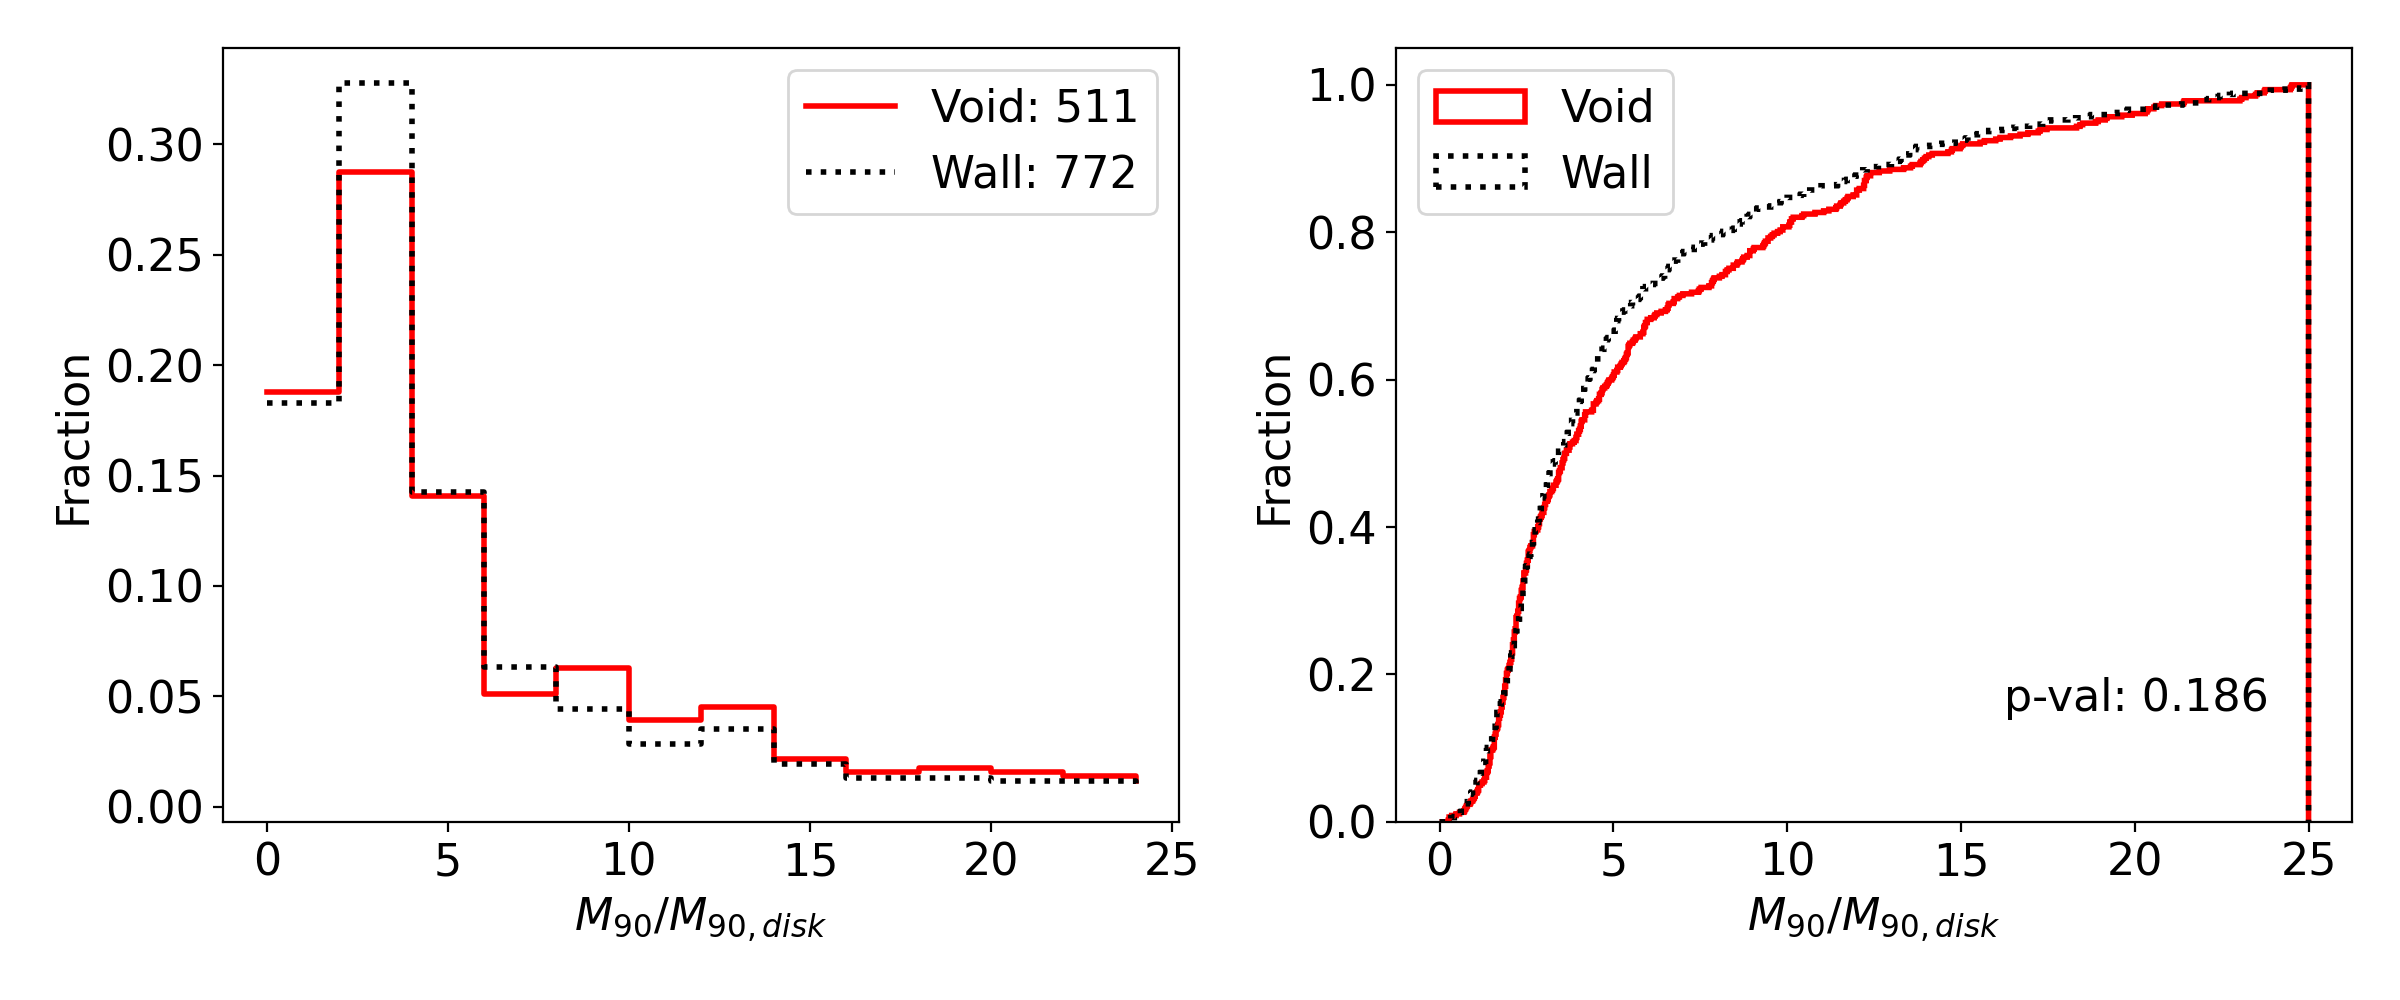

In [14]:
step_size = 2
ratio_bins = np.arange(0,25 + step_size, step_size)

plt.figure(figsize=(12,5))

# histogram
plt.subplot(121)
param_hist(void_gals, wall_gals, 'M90_Mdisk_ratio', ratio_bins)


# CDF
plt.subplot(122)
param_CDF(void_gals, wall_gals, 'M90_Mdisk_ratio', (0,25))

plt.tight_layout();

### Dwarf galaxies ($M_r > -17$)

<IPython.core.display.Javascript object>


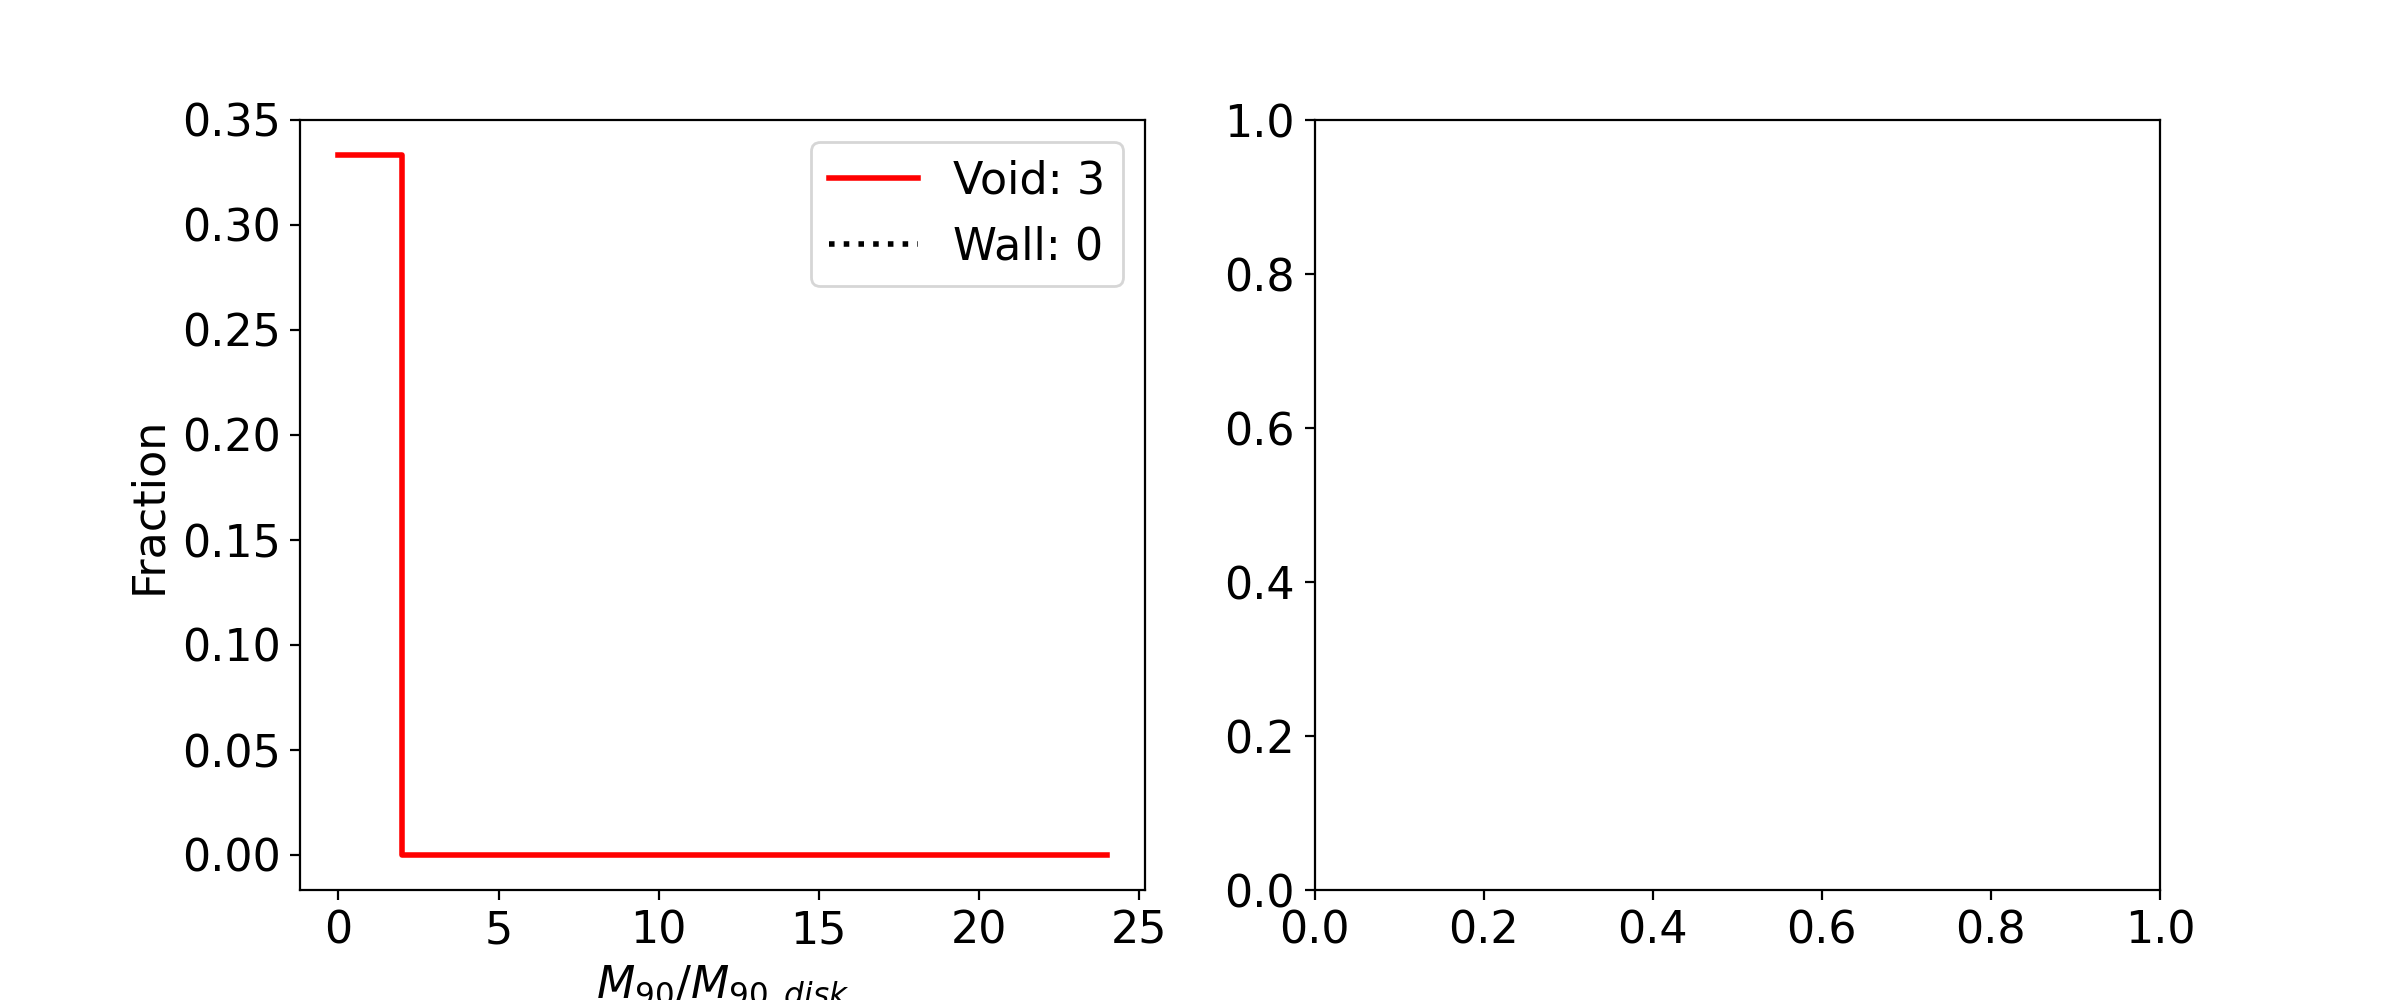

/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/mass_ratio_plottingFunctions.py:301: RuntimeWarning: invalid value encountered in true_divide
  nw = Nw/Ntot_wall


ValueError: Data passed to ks_2samp must not be empty

In [21]:
plt.figure(figsize=(12,5))

# histogram
plt.subplot(121)
param_hist(void_gals[void_gals['rabsmag'] > -17], 
           wall_gals[wall_gals['rabsmag'] > -17], 
           'M90_Mdisk_ratio', 
           ratio_bins)


# CDF
plt.subplot(122)
param_CDF(void_gals[void_gals['rabsmag'] > -17], 
          wall_gals[wall_gals['rabsmag'] > -17], 
          'M90_Mdisk_ratio', 
          (0,25))

plt.tight_layout();

### $-17 > M_r > -18$

<IPython.core.display.Javascript object>


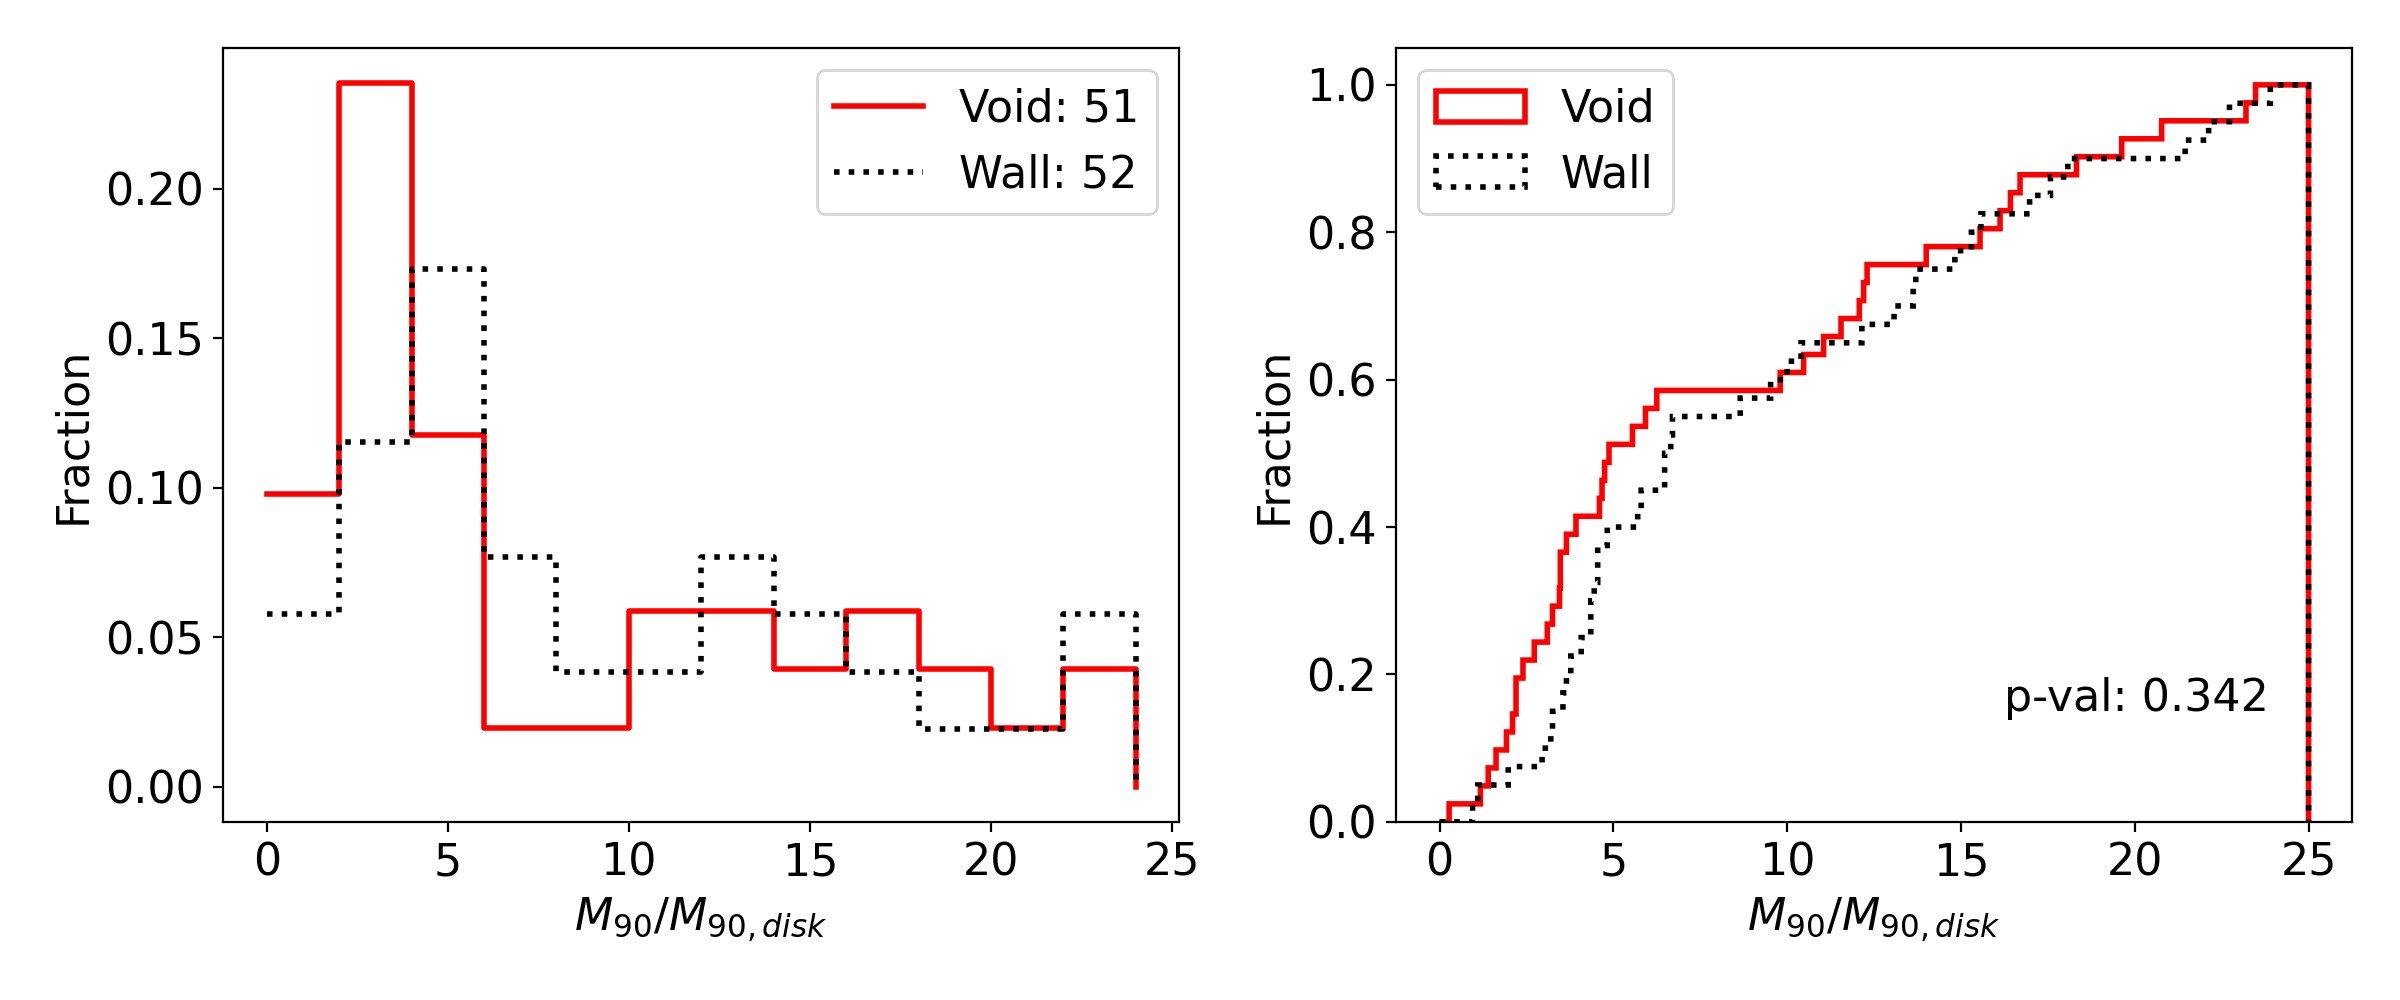

In [23]:
plt.figure(figsize=(12,5))

# histogram
plt.subplot(121)
param_hist(void_gals[(void_gals['rabsmag'] <= -17) & (void_gals['rabsmag'] > -18)], 
           wall_gals[(wall_gals['rabsmag'] <= -17) & (wall_gals['rabsmag'] > -18)], 
           'M90_Mdisk_ratio', 
           ratio_bins)


# CDF
plt.subplot(122)
param_CDF(void_gals[(void_gals['rabsmag'] <= -17) & (void_gals['rabsmag'] > -18)], 
          wall_gals[(wall_gals['rabsmag'] <= -17) & (wall_gals['rabsmag'] > -18)], 
          'M90_Mdisk_ratio', 
          (0,25))

plt.tight_layout();

### $-18 > M_r > -19$

<IPython.core.display.Javascript object>


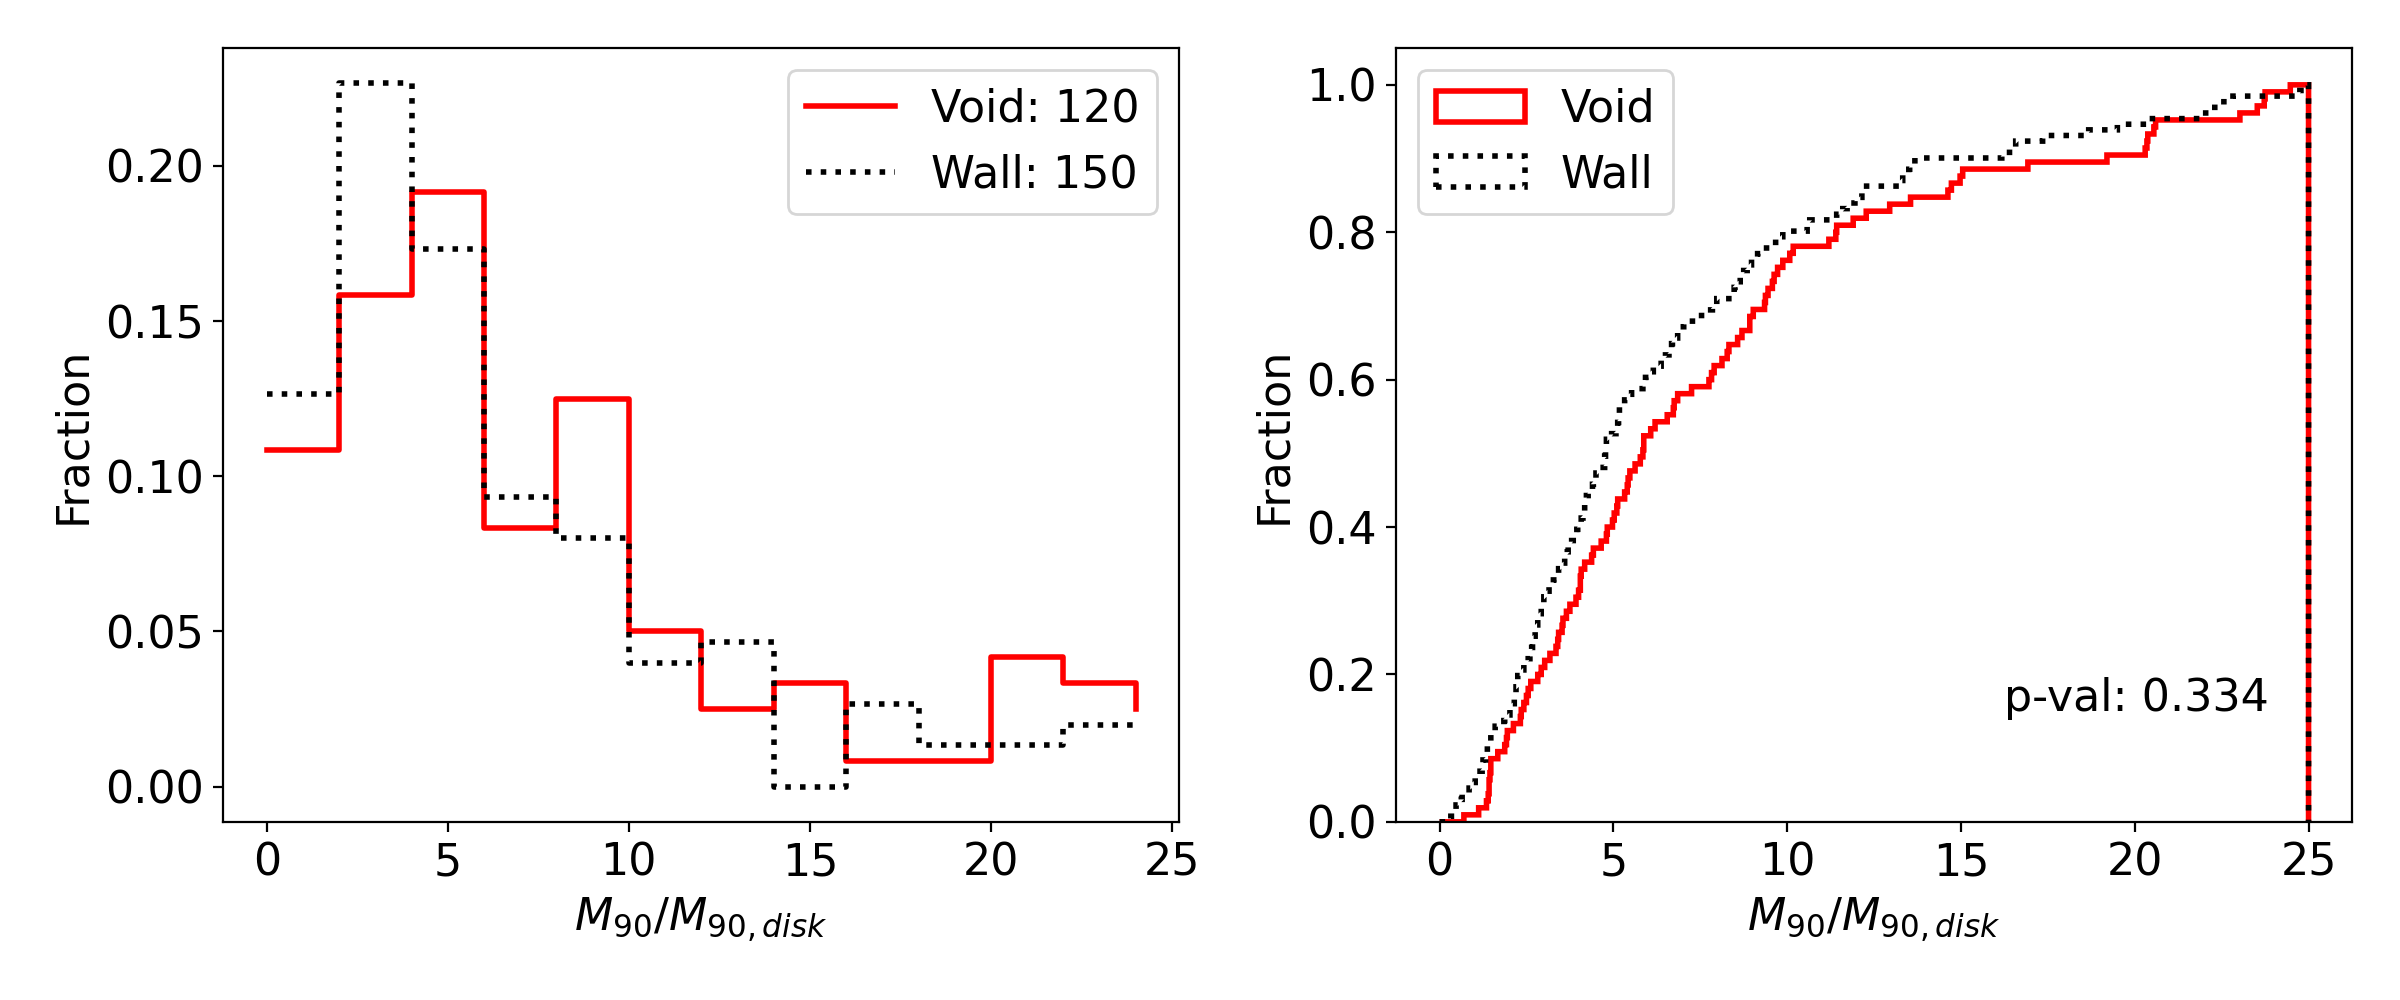

In [24]:
plt.figure(figsize=(12,5))

# histogram
plt.subplot(121)
param_hist(void_gals[(void_gals['rabsmag'] <= -18) & (void_gals['rabsmag'] > -19)], 
           wall_gals[(wall_gals['rabsmag'] <= -18) & (wall_gals['rabsmag'] > -19)], 
           'M90_Mdisk_ratio', 
           ratio_bins)


# CDF
plt.subplot(122)
param_CDF(void_gals[(void_gals['rabsmag'] <= -18) & (void_gals['rabsmag'] > -19)], 
          wall_gals[(wall_gals['rabsmag'] <= -18) & (wall_gals['rabsmag'] > -19)], 
          'M90_Mdisk_ratio', 
          (0,25))

plt.tight_layout();

### $-19 > M_r > -20$

<IPython.core.display.Javascript object>


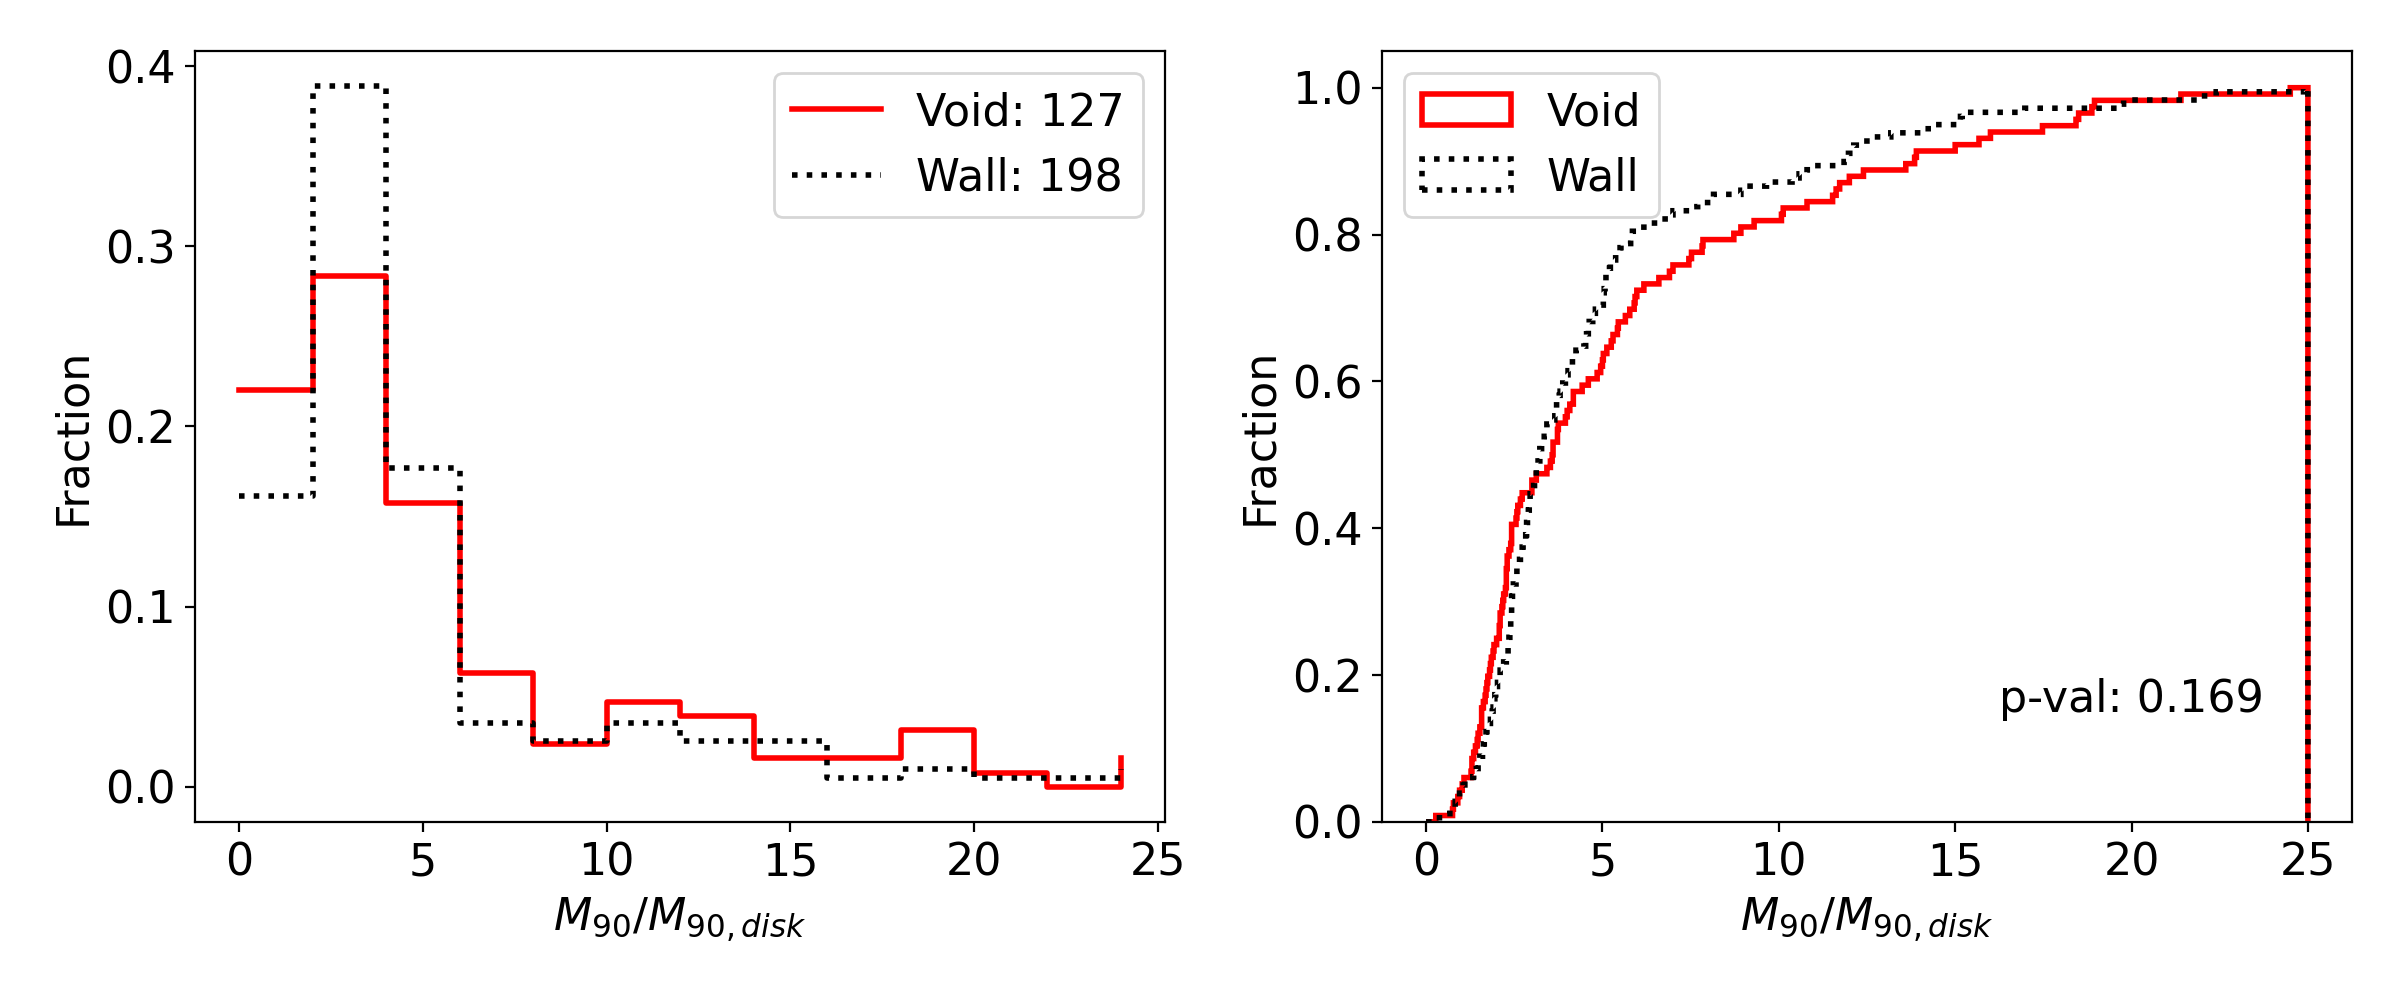

In [25]:
plt.figure(figsize=(12,5))

# histogram
plt.subplot(121)
param_hist(void_gals[(void_gals['rabsmag'] <= -19) & (void_gals['rabsmag'] > -20)], 
           wall_gals[(wall_gals['rabsmag'] <= -19) & (wall_gals['rabsmag'] > -20)], 
           'M90_Mdisk_ratio', 
           ratio_bins)


# CDF
plt.subplot(122)
param_CDF(void_gals[(void_gals['rabsmag'] <= -19) & (void_gals['rabsmag'] > -20)], 
          wall_gals[(wall_gals['rabsmag'] <= -19) & (wall_gals['rabsmag'] > -20)], 
          'M90_Mdisk_ratio', 
          (0,25))

plt.tight_layout();

### $M_r < -20$

<IPython.core.display.Javascript object>


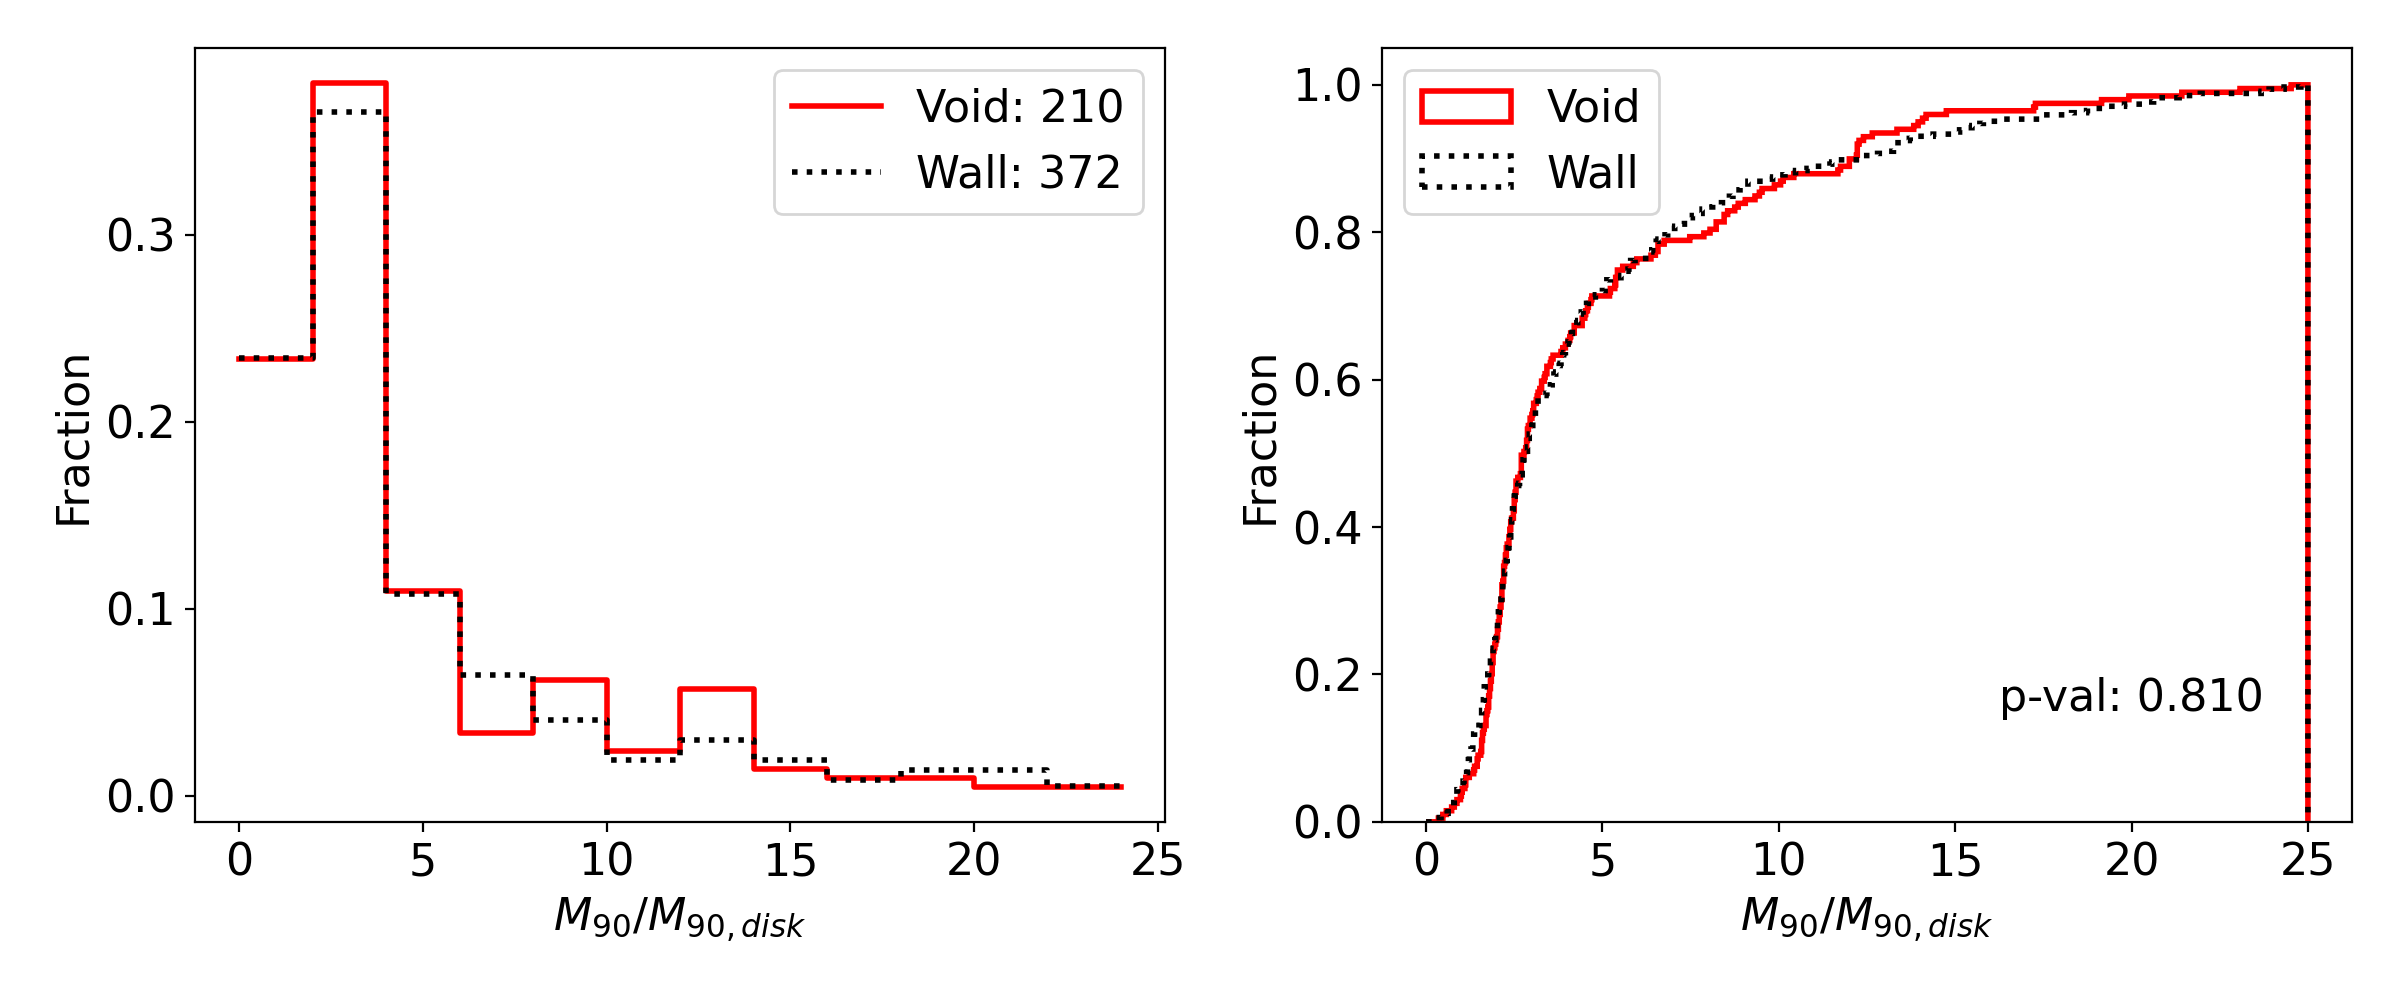

In [26]:
plt.figure(figsize=(12,5))

# histogram
plt.subplot(121)
param_hist(void_gals[void_gals['rabsmag'] <= -20], 
           wall_gals[wall_gals['rabsmag'] <= -20], 
           'M90_Mdisk_ratio', 
           ratio_bins)


# CDF
plt.subplot(122)
param_CDF(void_gals[void_gals['rabsmag'] <= -20], 
          wall_gals[wall_gals['rabsmag'] <= -20], 
          'M90_Mdisk_ratio', 
          (0,25))

plt.tight_layout();

## $R_{turn}$

<IPython.core.display.Javascript object>


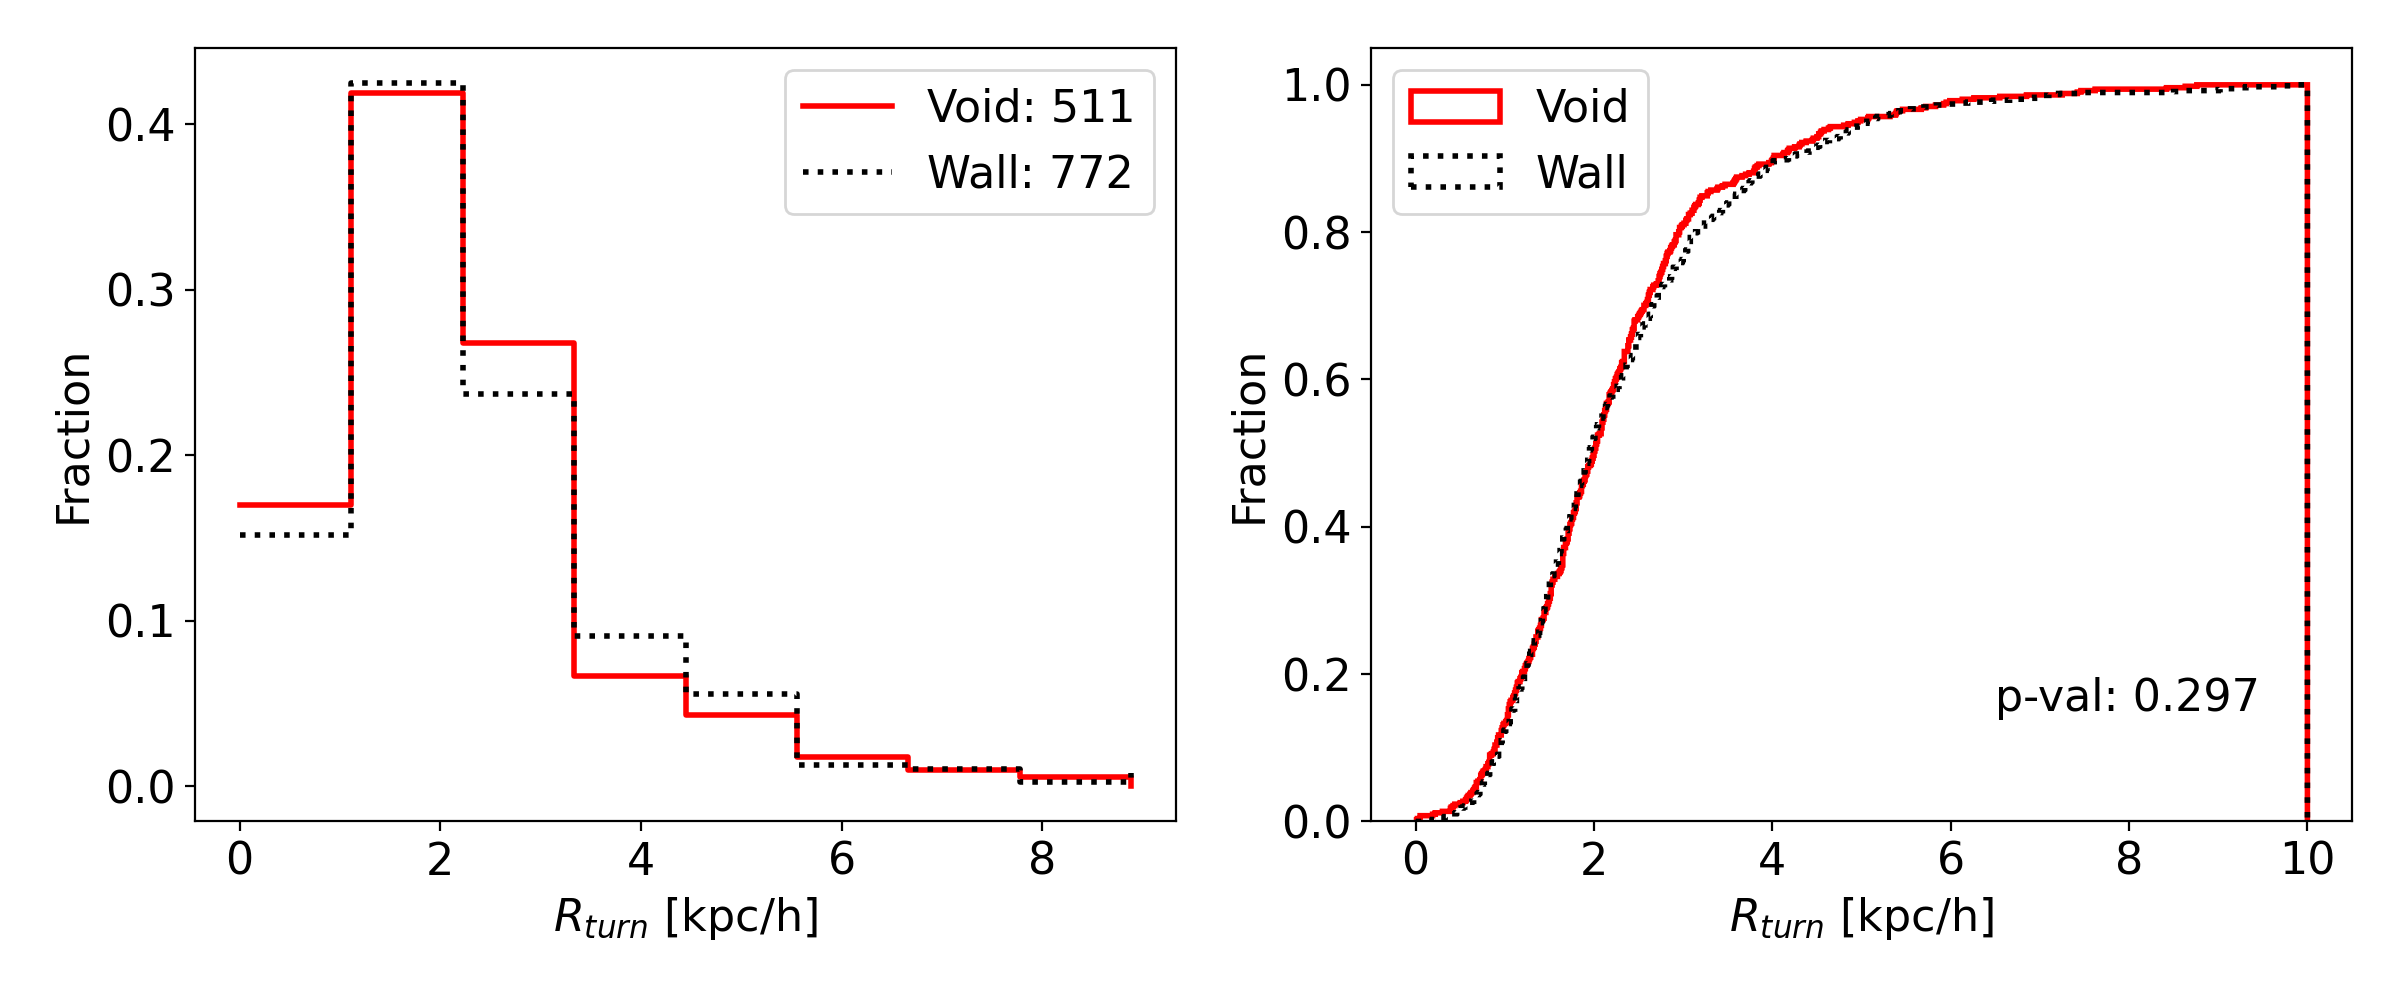

In [15]:
Rturn_bins = np.linspace(0,10,10)

plt.figure(figsize=(12,5))

# histogram
plt.subplot(121)
param_hist(void_gals, wall_gals, 'Rturn_map', Rturn_bins)


# CDF
plt.subplot(122)
param_CDF(void_gals, wall_gals, 'Rturn_map', (0,10))

plt.tight_layout();

## $R_{disk}$

<IPython.core.display.Javascript object>


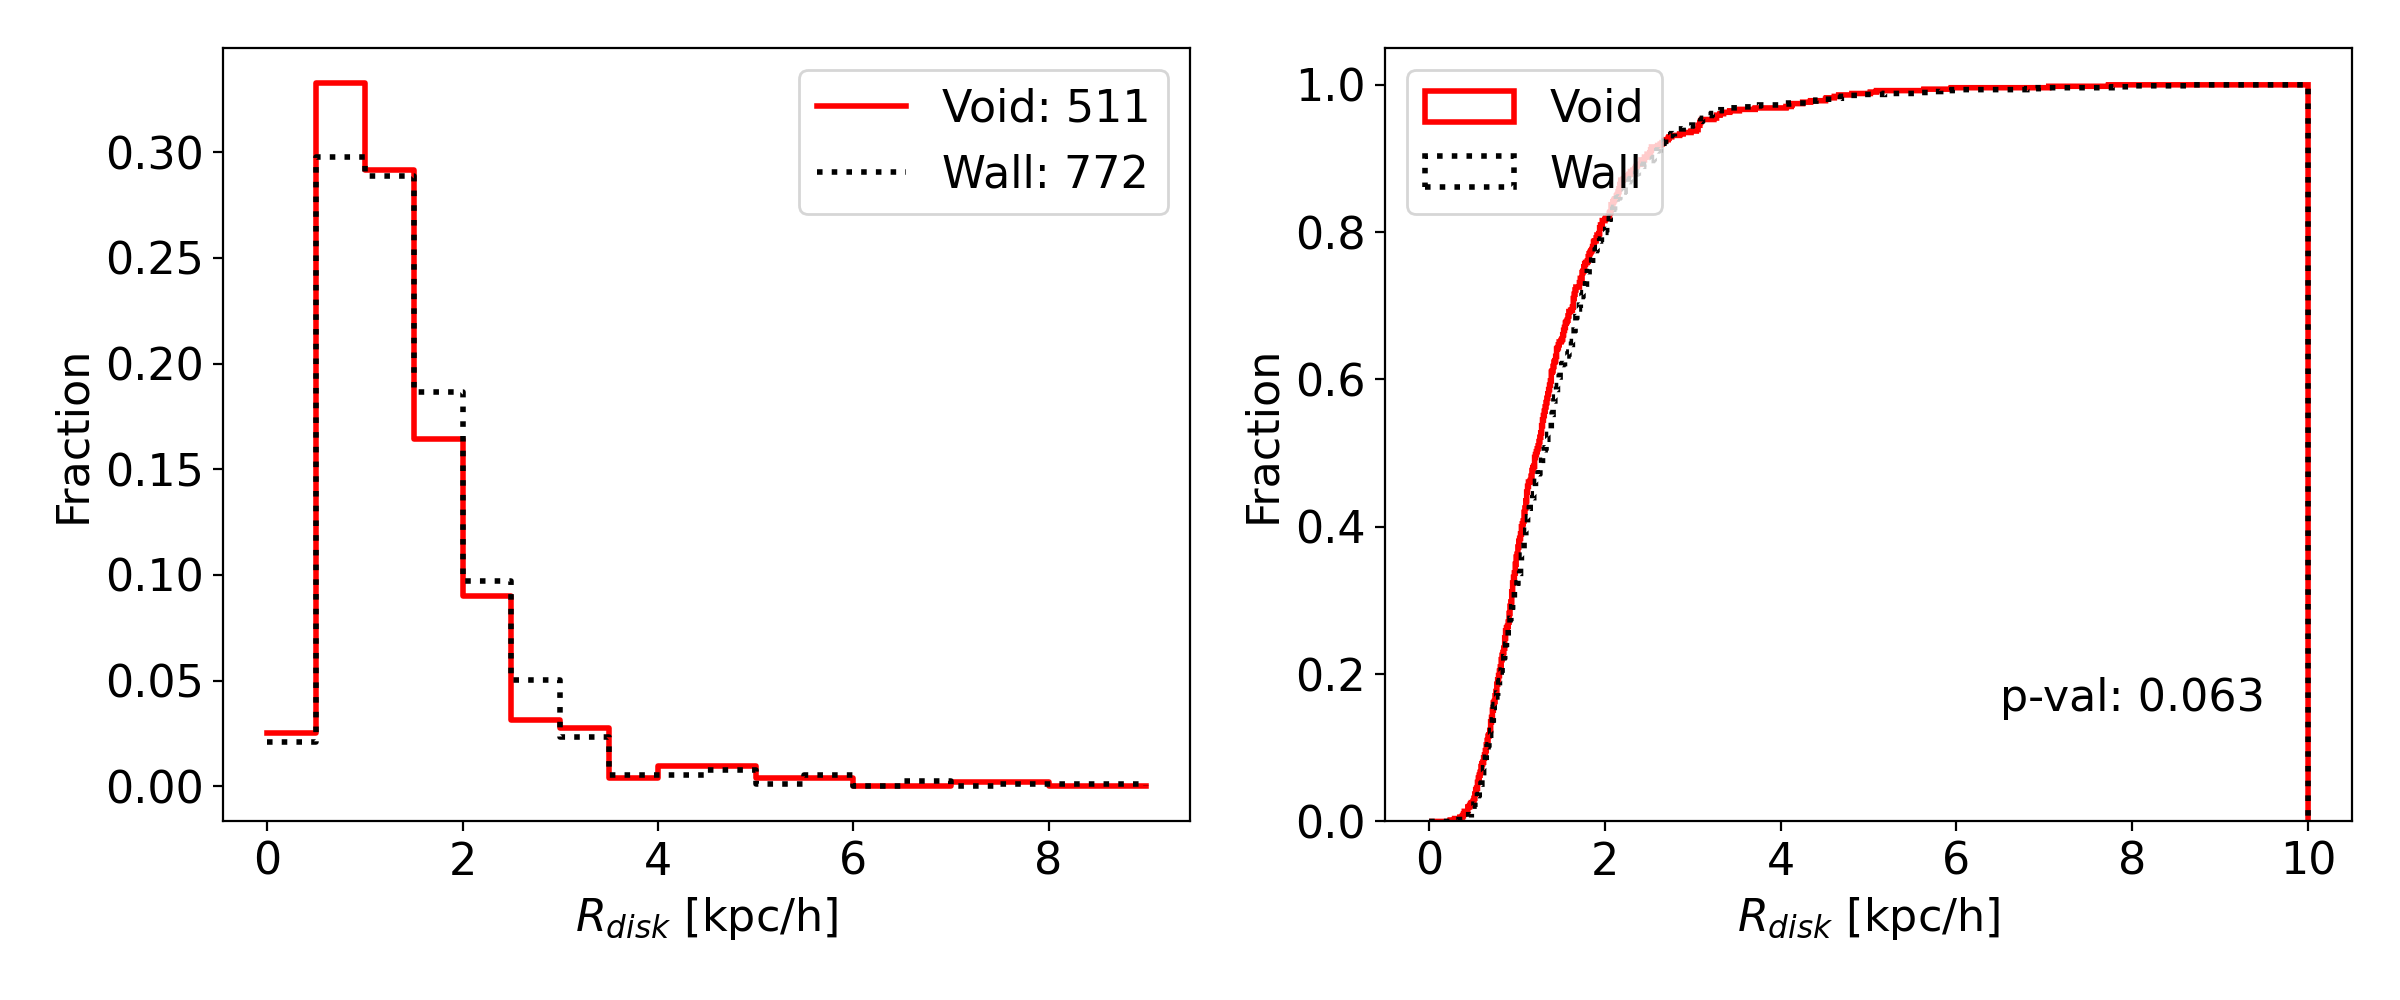

In [16]:
Rdisk_bins = np.arange(0,10,0.5)

plt.figure(figsize=(12,5))

# histogram
plt.subplot(121)
param_hist(void_gals, wall_gals, 'Rdisk_map', Rdisk_bins)


# CDF
plt.subplot(122)
param_CDF(void_gals, wall_gals, 'Rdisk_map', (0,10))

plt.tight_layout();

## Relationship between $R_{disk}$ and $M_{90}$

https://arxiv.org/abs/2010.03742 suggests that void galaxies should have a larger disk scale radius for a fixed mass.

<IPython.core.display.Javascript object>


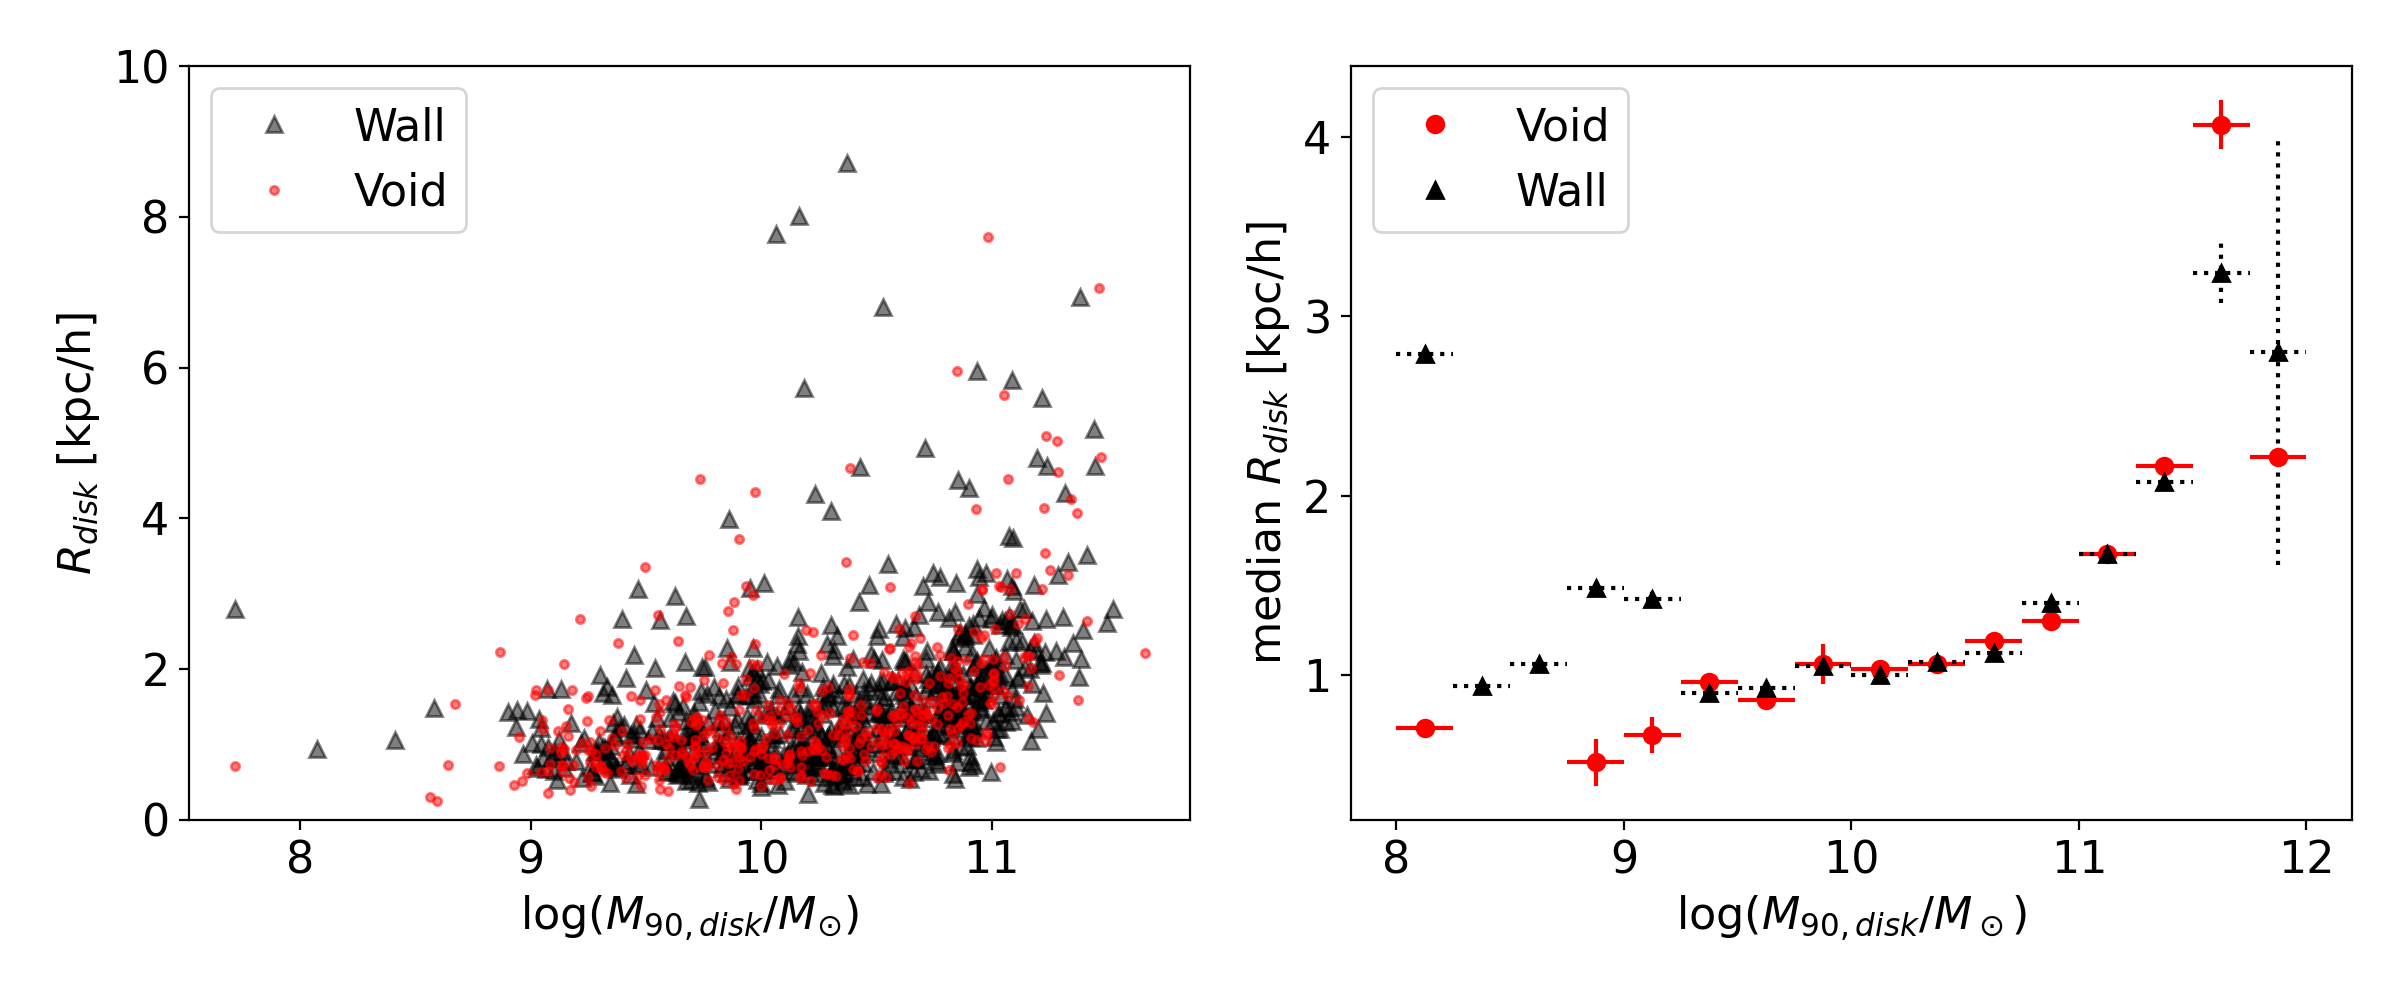

/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3417: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
plt.figure(figsize=(12,5))


plt.subplot(121)
plt.plot(wall_gals['M90_disk_map'], wall_gals['Rdisk_map'], 'k^', alpha=0.5, label='Wall')
plt.plot(void_gals['M90_disk_map'], void_gals['Rdisk_map'], 'r.', alpha=0.5, label='Void')

plt.ylim([0,10])

plt.xlabel('log($M_{90,disk}/M_{\odot}$)')
plt.ylabel('$R_{disk}$ [kpc/h]')

plt.legend()


plt.subplot(122)
median_hist(void_gals, wall_gals, 'M90_disk_map', 'Rdisk_map', np.arange(8,12,0.25))

plt.tight_layout();

<IPython.core.display.Javascript object>


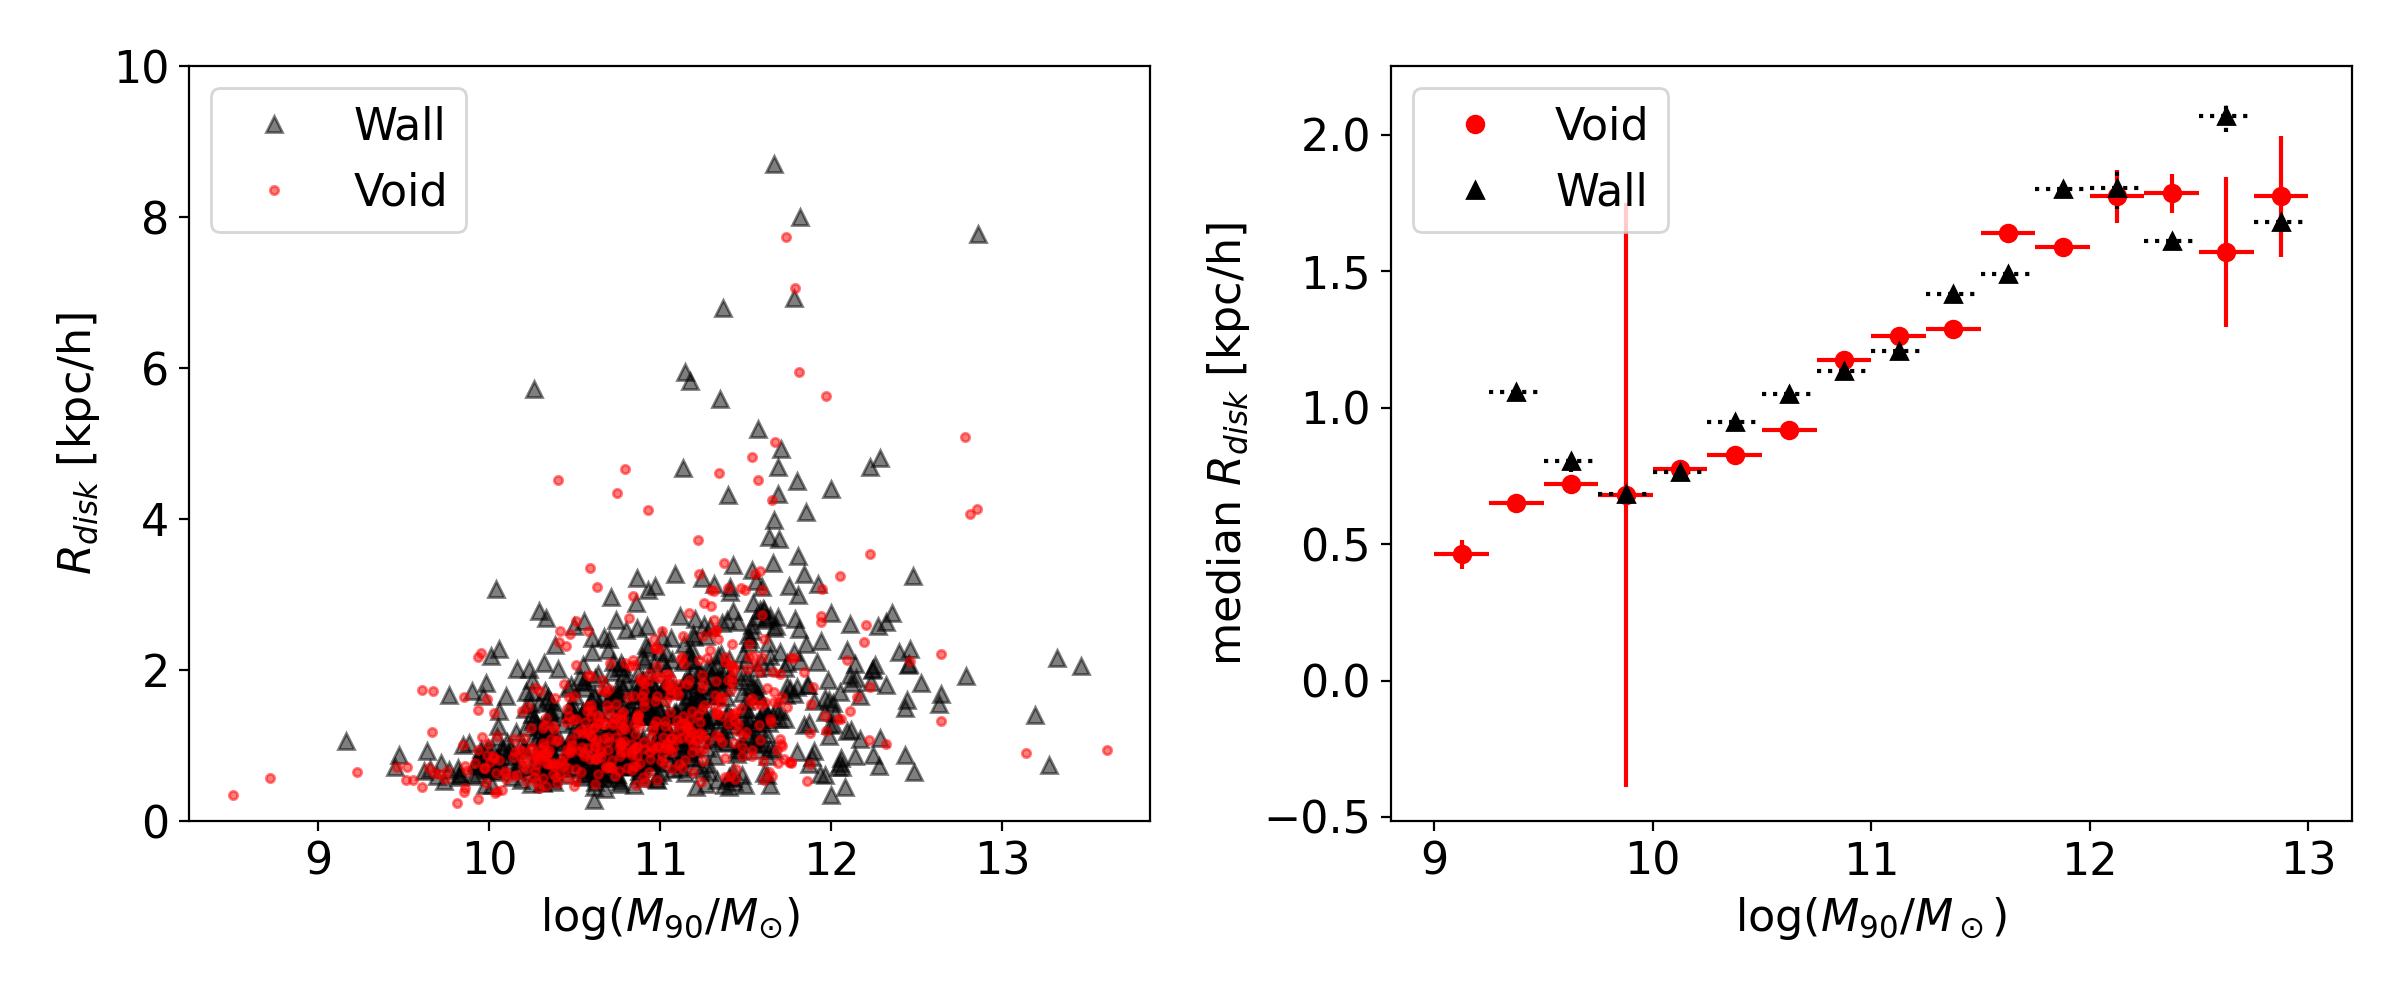

/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3417: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [18]:
plt.figure(figsize=(12,5))


plt.subplot(121)
plt.plot(wall_gals['M90_map'], wall_gals['Rdisk_map'], 'k^', alpha=0.5, label='Wall')
plt.plot(void_gals['M90_map'], void_gals['Rdisk_map'], 'r.', alpha=0.5, label='Void')

plt.ylim([0,10])

plt.xlabel('log($M_{90}/M_{\odot}$)')
plt.ylabel('$R_{disk}$ [kpc/h]')

plt.legend()


plt.subplot(122)
median_hist(void_gals, wall_gals, 'M90_map', 'Rdisk_map', np.arange(9,13,0.25))

plt.tight_layout();

## Relationship between $R_{turn}$ and $M_{90}$

<IPython.core.display.Javascript object>


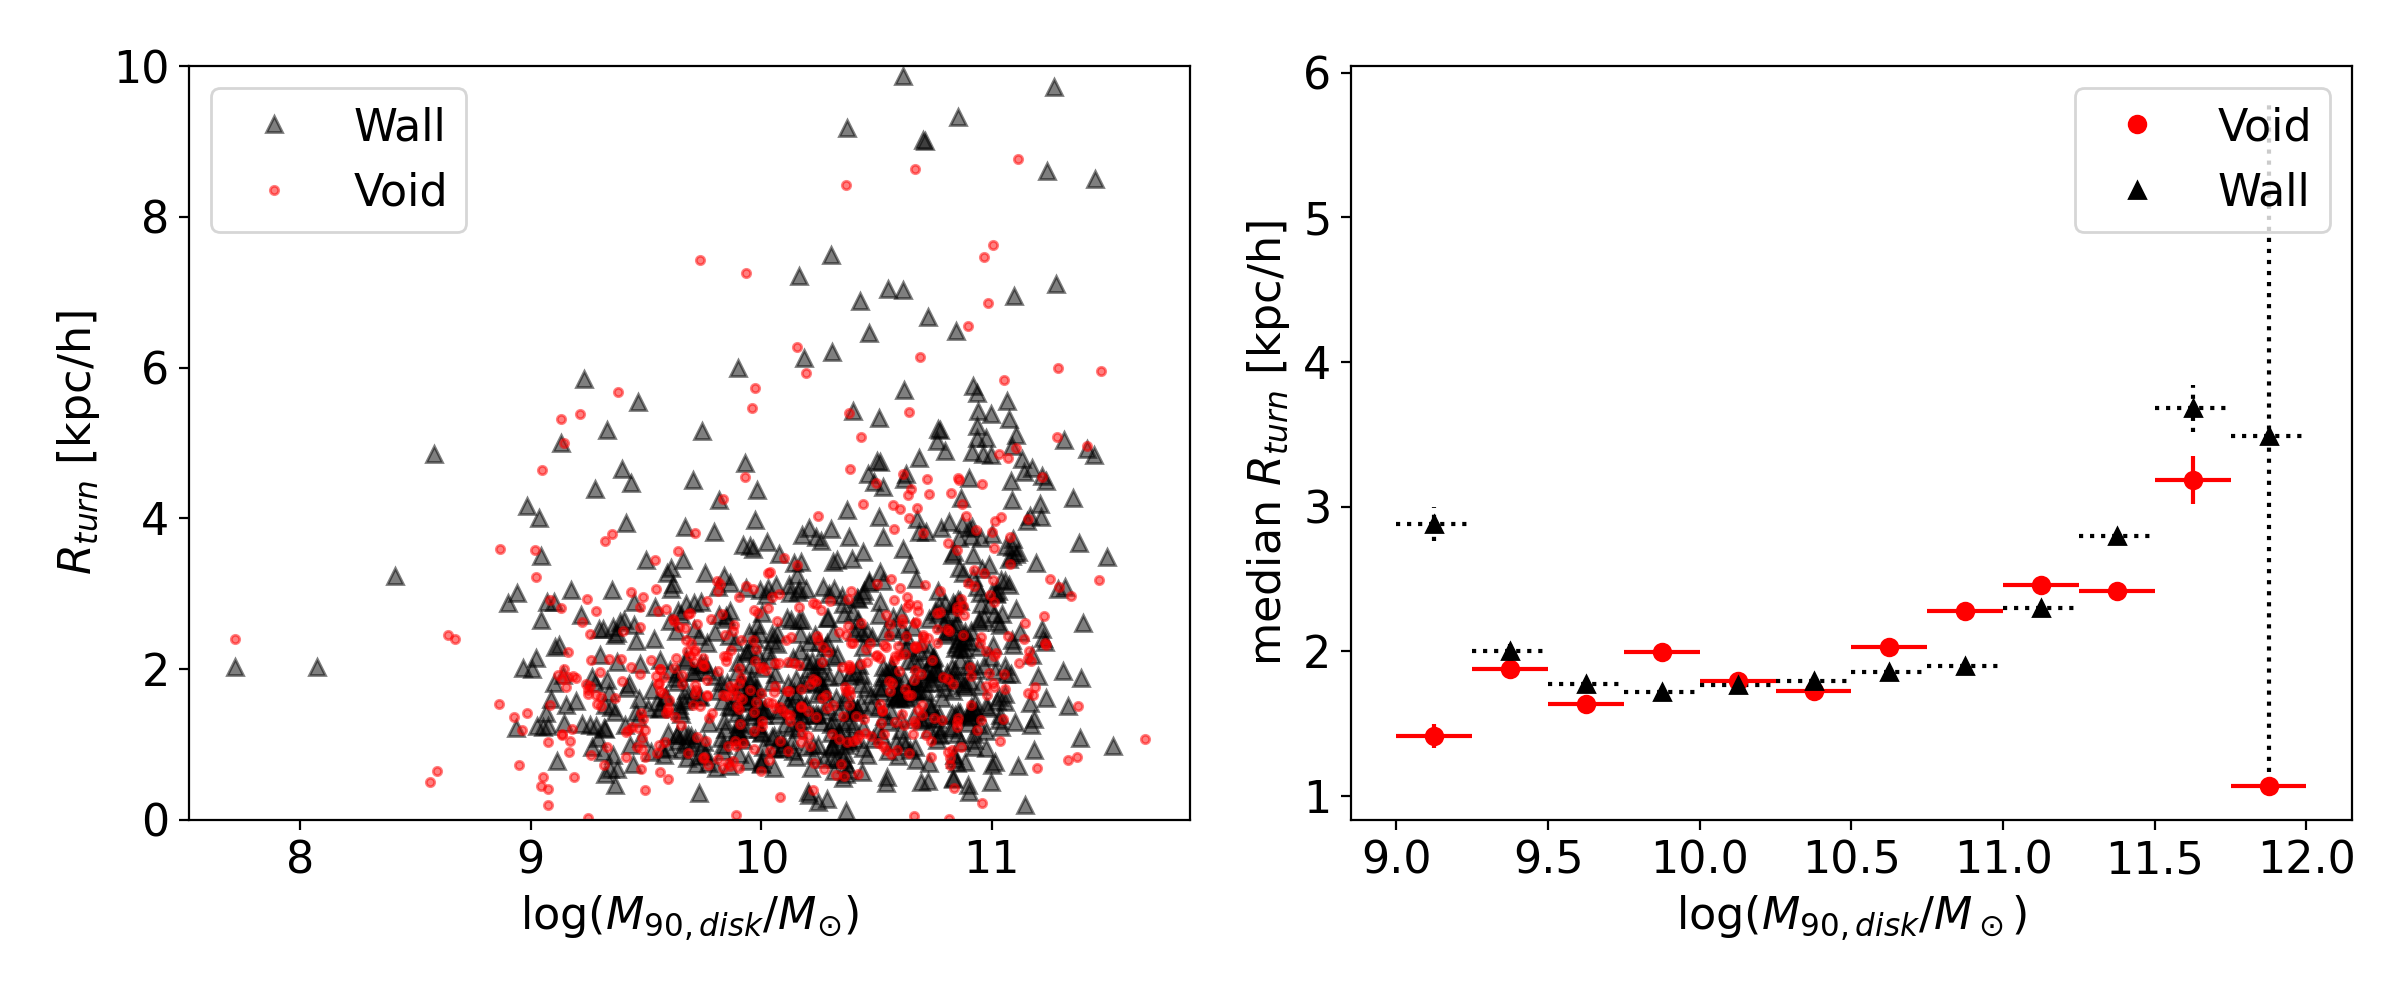

In [19]:
plt.figure(figsize=(12,5))


plt.subplot(121)
plt.plot(wall_gals['M90_disk_map'], wall_gals['Rturn_map'], 'k^', alpha=0.5, label='Wall')
plt.plot(void_gals['M90_disk_map'], void_gals['Rturn_map'], 'r.', alpha=0.5, label='Void')

plt.ylim([0,10])

plt.xlabel('log($M_{90,disk}/M_{\odot}$)')
plt.ylabel('$R_{turn}$ [kpc/h]')

plt.legend()


plt.subplot(122)
median_hist(void_gals, wall_gals, 'M90_disk_map', 'Rturn_map', np.arange(9,12,0.25))

plt.tight_layout();

<IPython.core.display.Javascript object>


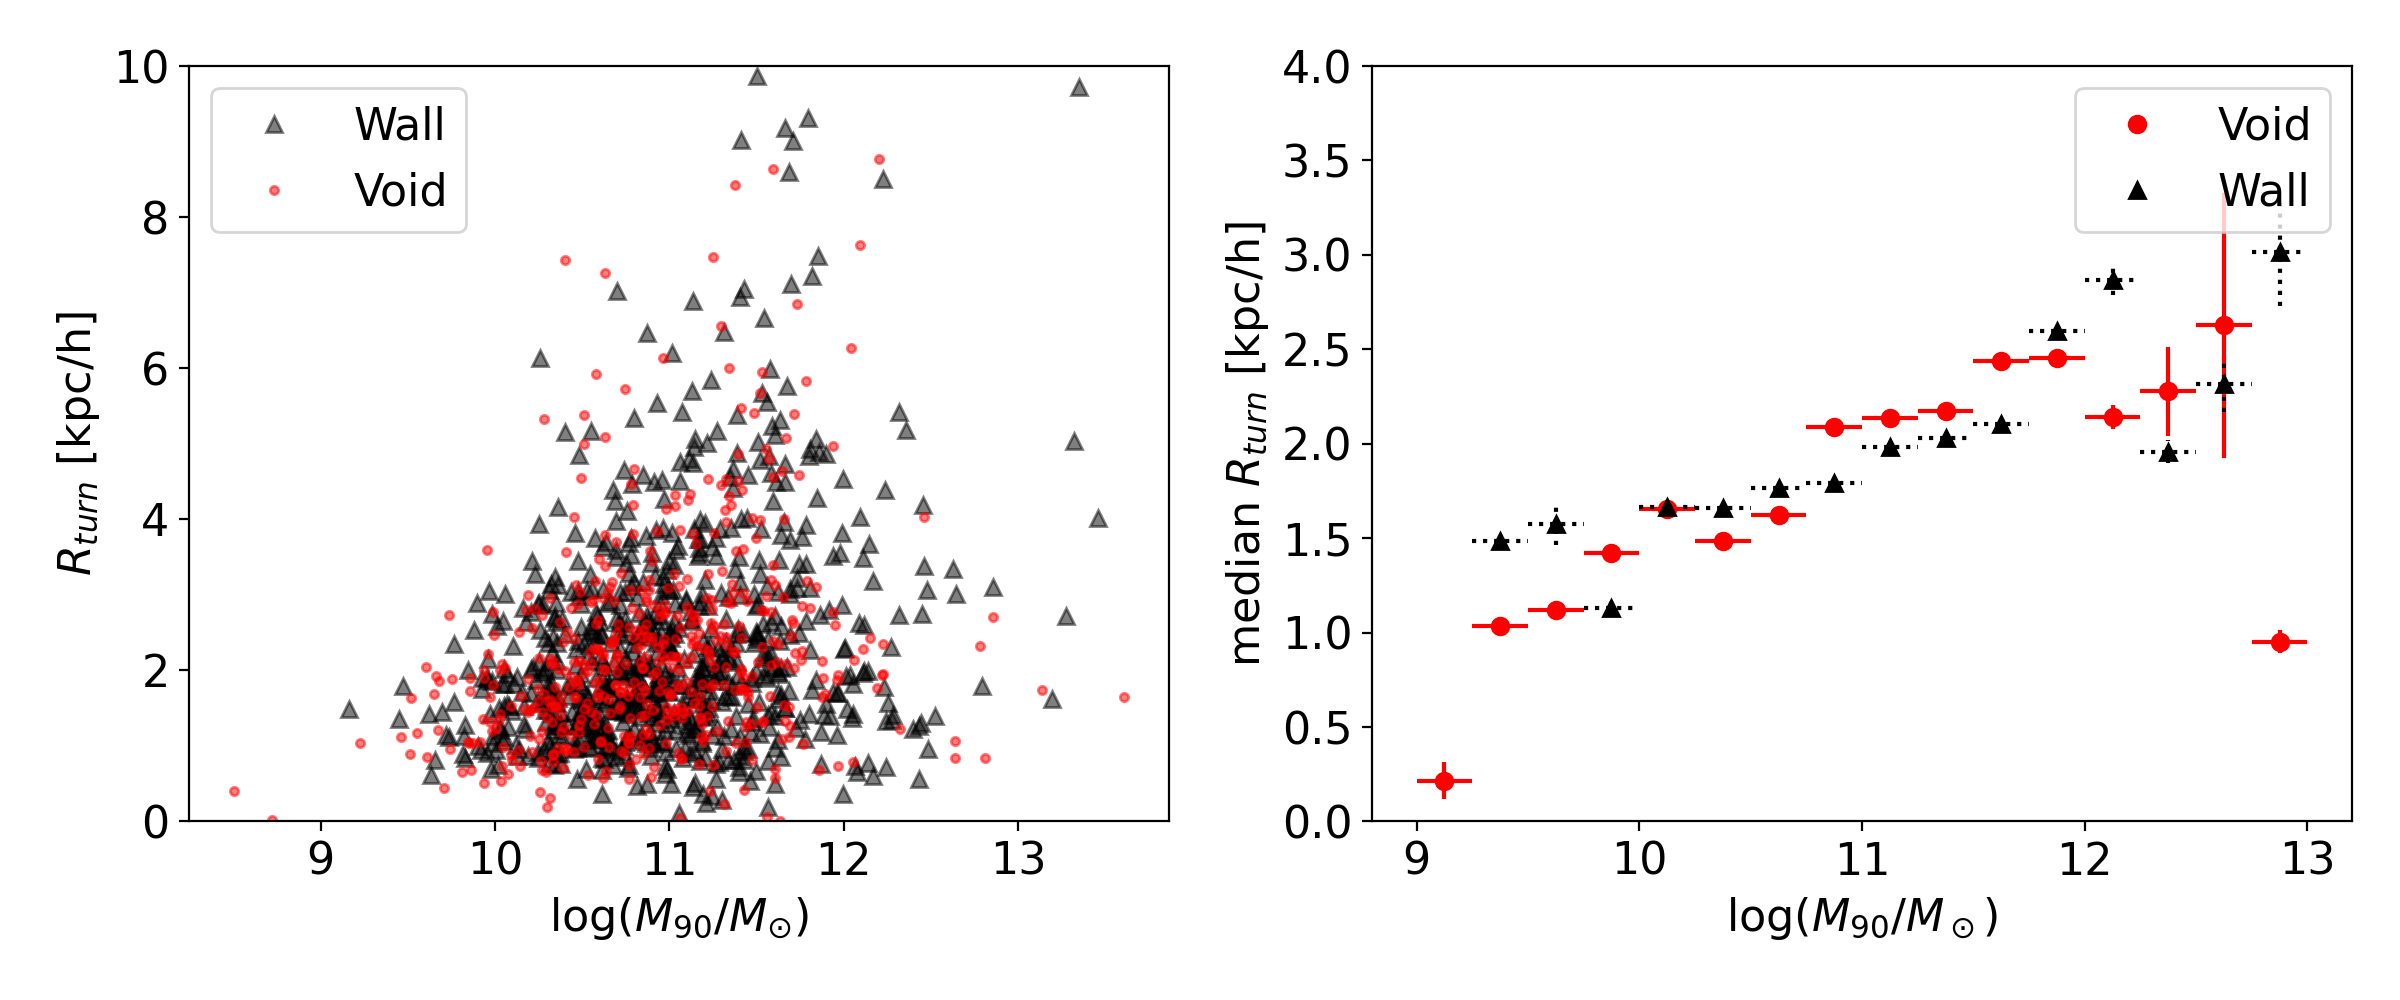

/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3417: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [20]:
plt.figure(figsize=(12,5))


plt.subplot(121)
plt.plot(wall_gals['M90_map'], wall_gals['Rturn_map'], 'k^', alpha=0.5, label='Wall')
plt.plot(void_gals['M90_map'], void_gals['Rturn_map'], 'r.', alpha=0.5, label='Void')

plt.ylim([0,10])

plt.xlabel('log($M_{90}/M_{\odot}$)')
plt.ylabel('$R_{turn}$ [kpc/h]')

plt.legend()


plt.subplot(122)
median_hist(void_gals, wall_gals, 'M90_map', 'Rturn_map', np.arange(9,13,0.25))

plt.ylim([0,4])

plt.tight_layout();